# Results of the pipeline

919


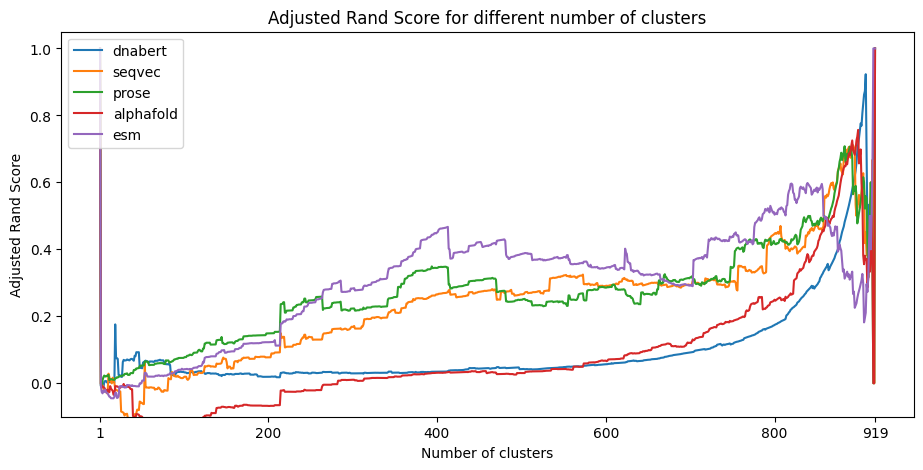

dnabert    seqvec     prose  alphafold       esm
combiner dimensional PCA                                                   
pca      10               0.197772  0.272439  0.250221   0.206354  0.256368
         50               0.241328  0.280856  0.260751   0.330710  0.415670
         all              0.243091  0.303842  0.260751   0.334966  0.490667
average  10               0.038632  0.333708  0.300119   0.233584  0.363443
         50               0.037212  0.381012  0.300608   0.313318  0.528961
         all              0.032120  0.433093  0.300608   0.296862  0.557521
sum      10               0.139427  0.203567  0.305440   0.287453  0.195052
         50               0.091398  0.166096  0.303833   0.211372  0.169972
         all              0.098712  0.127185  0.303833   0.214151  0.219790
max      10               0.023850  0.246287  0.351959   0.147220  0.355727
         50               0.058550  0.431791  0.421859   0.287491  0.473200
         all              0.087641  0.350877  0.430568   0.312053  0.479532

In [1]:
import sys
sys.path.append('..')
import pickle
from autoembedding.results_manager import results2table
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

PATH = '/storagenfs/m.tolloso/BioEmbedding/results/phylogenetic_results_mouse.pkl'

results = pickle.load(open(PATH, "rb"))
r, best_lst, results_dict_ars = results2table(
    results, 
    embedders= [
        "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    metric="mean_adjusted_rand_score", 
    
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="average", 
    
    preferred_metric_gt="euclidean", # euclidean, average: equivalent to UPGMA when the gt is the distance matrix
    preferred_method_gt="average",
    
    preferred_edge_weight="jaccard",
    preferred_annotation="keywords"
)
r.to_latex("./latex_output.tex")

fig, _ = plt.subplots(figsize=(11, 5))

plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score for different number of clusters")

plt.ylim(-0.1, 1.05)

X = [i for i in range(len(best_lst), 0, -1)]
print(len(best_lst))

plt.xticks([i for i in range(0, len(best_lst)+1, 200)][1:] + [1] + [len(best_lst)])

plt.plot(X, results_dict_ars['pca']['all']['dnabert'], label='dnabert')
plt.plot(X, results_dict_ars['average']['all']['seqvec'], label='seqvec')
plt.plot(X, results_dict_ars['max']['all']['prose'], label='prose')
plt.plot(X, results_dict_ars['max']['all']['alphafold'], label='alphafold')
plt.plot(X, results_dict_ars['max']['all']['esm'], label='esm')
plt.legend(loc = "upper left")
plt.show()
# fig.savefig(Path(PATH).stem + '.eps')
r
